# A5-A7: Extended Analysis

In this analysis, we will explore if vaccination is effective in reducing the spread of COVID-19.

## Data Loading

In this section, we import library and load data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_cases = pd.read_csv("RAW_us_confirmed_cases.csv")
covid_vaccine = pd.read_csv("vaccine-by-county.csv")

In [3]:
covid_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408


In [4]:
covid_vaccine.tail()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
1178069,12/13/2020,17083,51,Jersey County,IL,0.0,0,0.0,0.0,0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1178070,12/13/2020,19099,51,Jasper County,IA,0.0,0,0.0,0.0,0,...,B,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1178071,12/13/2020,40103,51,Noble County,OK,0.0,0,0.0,0.0,0,...,B,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1178072,12/13/2020,21073,51,Franklin County,KY,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1178073,12/13/2020,53001,51,Adams County,WA,0.0,0,0.0,0.0,0,...,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN


In [5]:
covid_cases_filtered = covid_cases[(covid_cases['Admin2']=='Fulton') & (covid_cases['Province_State']=='Georgia')]

In [6]:
covid_vaccine_filtered = covid_vaccine[(covid_vaccine['Recip_County']=='Fulton County')&(covid_vaccine['Recip_State']=='GA')]

In [7]:
# dates: 12/13/20 to 12/06/21
covid_vaccine_filtered.tail()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
1164590,12/17/2020,13121,51,Fulton County,GA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1168271,12/16/2020,13121,51,Fulton County,GA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1170008,12/15/2020,13121,51,Fulton County,GA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1173573,12/14/2020,13121,51,Fulton County,GA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1177704,12/13/2020,13121,51,Fulton County,GA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


In [8]:
## dates only from to 04/10 to 08/15, inclusive
covid_cases_filtered.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
470,Georgia,Fulton,84013121,US,USA,840,13121.0,US,33.792169,-84.463194,...,131261,131261,131476,131559,131658,131781,131898,131898,131898,132103


## Data Preprocessing

In this section, we process the data by finding covid cases counts and merging tables.

In [9]:
covid_cases_unpivot=pd.melt(covid_cases_filtered, id_vars=['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], var_name='date', value_name='infected')

In [10]:
# This function formats the date for joining purpose
def transform_date(date):
    date_parts = date.split('/')
    month = date_parts[0]
    day = date_parts[1]
    year = date_parts[2]
    if month[0]=='0':
        month = month[1]
    if day[0]=='0':
        day = day[1]
    
    return month+'/'+day+'/'+year

In [11]:
covid_cases_by_date = covid_cases_unpivot[['date', 'infected']]
covid_vaccine_by_date = covid_vaccine_filtered[['Date','Series_Complete_Pop_Pct']]
covid_vaccine_by_date['date'] = covid_vaccine_by_date['Date'].apply(lambda x: x[:-4]+x[-2:])
covid_vaccine_by_date['date'] = covid_vaccine_by_date['date'].apply(lambda x: transform_date(x))

/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
covid_vaccine_by_date.shape

(359, 3)

In [13]:
covid_cases_and_vaccine = covid_cases_by_date.merge(covid_vaccine_by_date, how='inner', on='date')

In [14]:
covid_cases_and_vaccine.head()

,date,infected,Date,Series_Complete_Pop_Pct
0,12/13/20,46896,12/13/2020,0.0
1,12/14/20,47182,12/14/2020,0.0
2,12/15/20,47904,12/15/2020,0.0
3,12/16/20,48414,12/16/2020,0.0
4,12/17/20,49072,12/17/2020,0.0


## Data Analysis: Fulton County

In this section, we plot the infection rates of Fulton County and see if there are any differences with or without mask mandates.

In [15]:
dates = pd.date_range('2020-12-13', '2021-11-01')

In [16]:
fulton_population = 1064000
cumulative_infected = list(covid_cases_and_vaccine['infected'])
cumulative_infected = [x/fulton_population for x in cumulative_infected]

/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


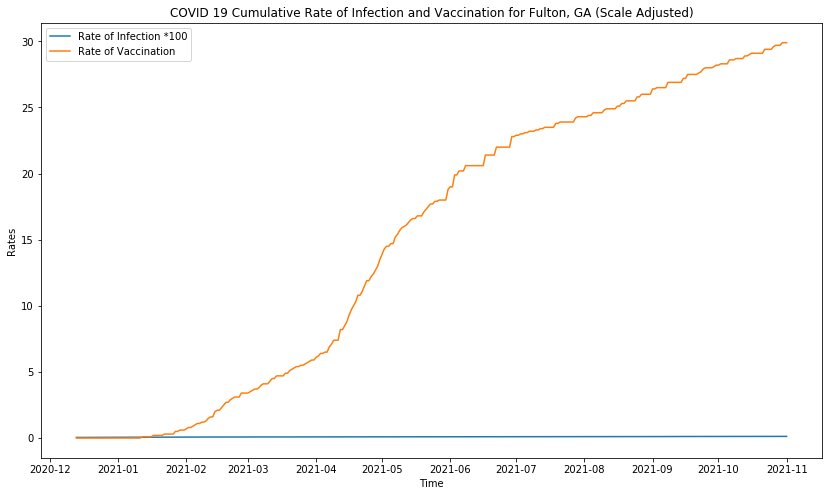

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates), cumulative_infected, color='C0', label='Rate of Infection *100')
plt.plot(list(dates), covid_cases_and_vaccine['Series_Complete_Pop_Pct'], color='C1', label='Rate of Vaccination')

plt.title("COVID 19 Cumulative Rate of Infection and Vaccination for Fulton, GA (Scale Adjusted)")
plt.xlabel("Time")
plt.ylabel("Rates")
plt.legend()

In [18]:
daily_infected = [(cumulative_infected[i]-cumulative_infected[i-1]) for i in range(1,len(cumulative_infected))]

In [19]:
daily_infected_smoothed = [sum(daily_infected[i-7:i])/7 for i in range(7,len(daily_infected))]

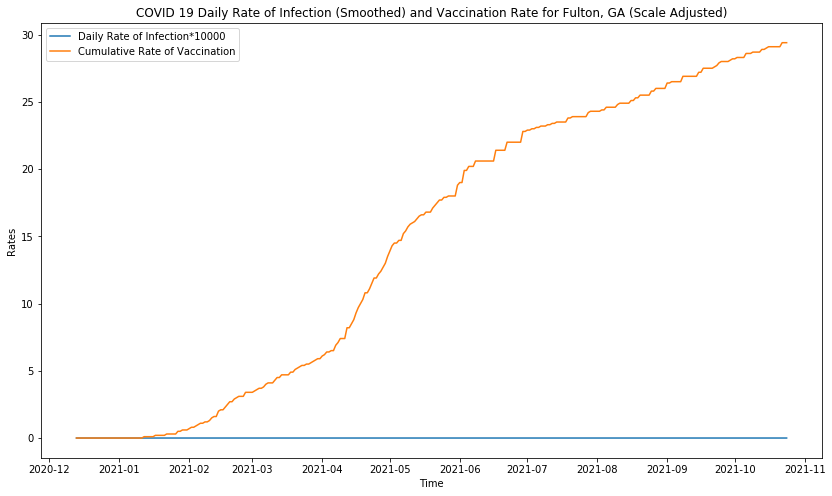

In [20]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates)[:-8], daily_infected_smoothed, color='C0', label='Daily Rate of Infection*10000')
plt.plot(list(dates)[:-8], list(covid_cases_and_vaccine['Series_Complete_Pop_Pct'])[:-8], color='C1', label='Cumulative Rate of Vaccination')

plt.title("COVID 19 Daily Rate of Infection (Smoothed) and Vaccination Rate for Fulton, GA (Scale Adjusted)")
plt.xlabel("Time")
plt.ylabel("Rates")
plt.legend()

## Data Analysis: Fulton County vs. Valley County

In this section, we compare Fulton County's data with Valley County because Valley county has low mask wearing rate based on the mask wearing survey.
Here we only compare the vaccination rate difference. For infection rate, see common analysis.

In [21]:
covid_cases_valley = covid_cases[(covid_cases['Admin2']=='Valley') & (covid_cases['Province_State']=='Montana')]
covid_vaccine_valley = covid_vaccine[(covid_vaccine['Recip_County']=='Valley County')&(covid_vaccine['Recip_State']=='MT')]

In [22]:
covid_cases_valley.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
1714,Montana,Valley,84030105,US,USA,840,30105.0,US,48.364351,-106.666963,...,1244,1244,1244,1254,1254,1254,1268,1268,1268,1276


In [23]:
covid_cases_unpivot_valley=pd.melt(covid_cases_valley, id_vars=['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], var_name='date', value_name='infected')

In [24]:
covid_cases_by_date_valley = covid_cases_unpivot_valley[['date', 'infected']]
covid_vaccine_by_date_valley = covid_vaccine_valley[['Date','Series_Complete_Pop_Pct']]
covid_vaccine_by_date_valley['date'] = covid_vaccine_by_date_valley['Date'].apply(lambda x: x[:-4]+x[-2:])
covid_vaccine_by_date_valley['date'] = covid_vaccine_by_date_valley['date'].apply(lambda x: transform_date(x))

/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangjunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
covid_cases_and_vaccine_valley = covid_cases_by_date_valley.merge(covid_vaccine_by_date_valley, how='inner', on='date')

In [26]:
valley_population=7471
cumulative_infected_valley = list(covid_cases_and_vaccine_valley['infected'])
cumulative_infected_valley = [x/valley_population for x in cumulative_infected_valley]

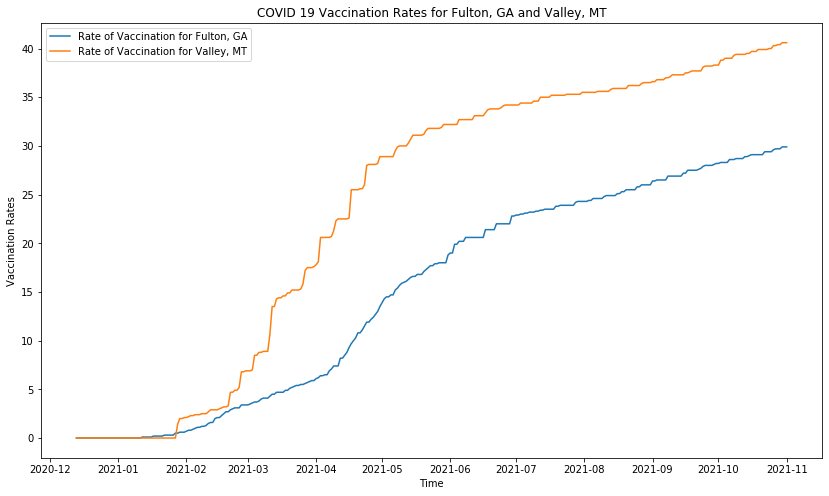

In [27]:
plt.figure(figsize=(14, 8))
plt.plot(list(dates), covid_cases_and_vaccine['Series_Complete_Pop_Pct'], color='C0', label='Rate of Vaccination for Fulton, GA')
plt.plot(list(dates), covid_cases_and_vaccine_valley['Series_Complete_Pop_Pct'], color='C1', label='Rate of Vaccination for Valley, MT')

plt.title("COVID 19 Vaccination Rates for Fulton, GA and Valley, MT")
plt.xlabel("Time")
plt.ylabel("Vaccination Rates")
plt.legend()